# Credit Card Fraud Detection - Data-Driven Analysis

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve,
    precision_score, recall_score, f1_score
)
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


## Load and Inspect Dataset

In [2]:

df = pd.read_csv('/content/creditcard.csv')
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Class Distribution (Fraud vs Non-Fraud)

Class
0    284315
1       492
Name: count, dtype: int64


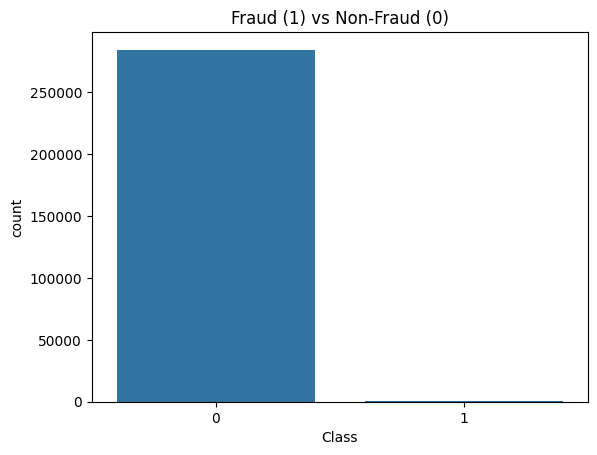

In [3]:

class_counts = df['Class'].value_counts()
print(class_counts)
sns.countplot(x='Class', data=df)
plt.title('Fraud (1) vs Non-Fraud (0)')
plt.show()


## Correlation Heatmap

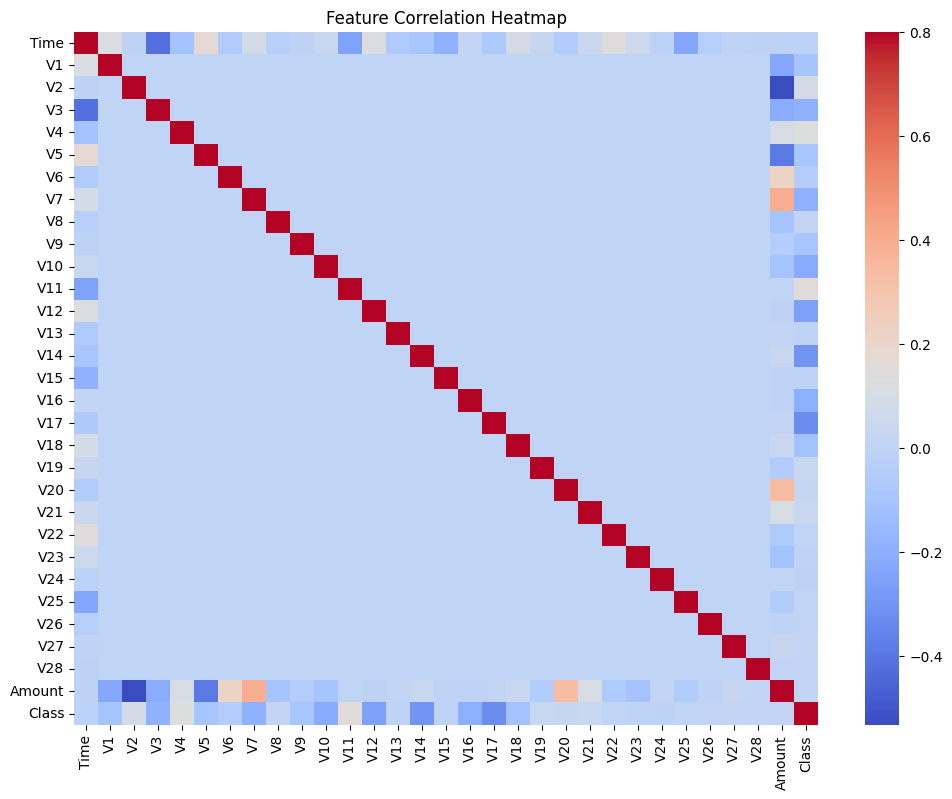

In [4]:

corr = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr, cmap='coolwarm', vmax=0.8)
plt.title('Feature Correlation Heatmap')
plt.show()


## Data Preparation

In [5]:

X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)


## Model Training (Random Forest)

In [6]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


## Model Evaluation

In [7]:

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC Score: 0.9340846870083637
Precision: 0.9576271186440678
Recall: 0.7635135135135135
F1 Score: 0.849624060150376


## Model Accuracy

In [8]:

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9995318516437859


## Confusion Matrix

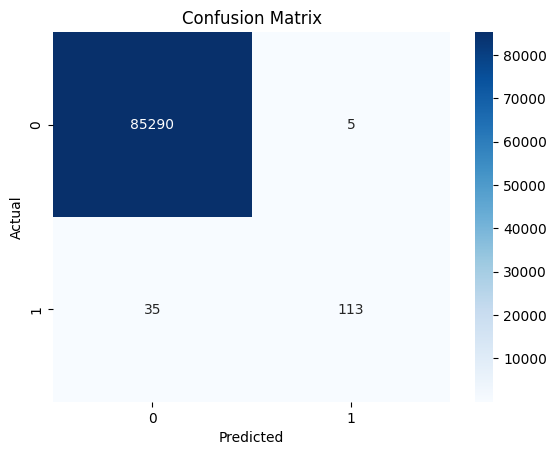

In [9]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## ROC Curve

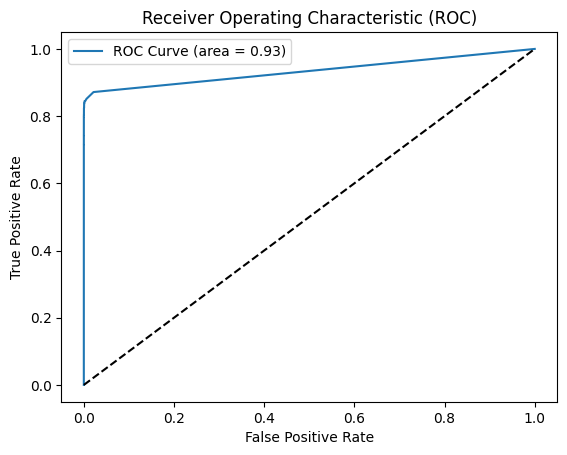

In [10]:

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()


## Feature Importance

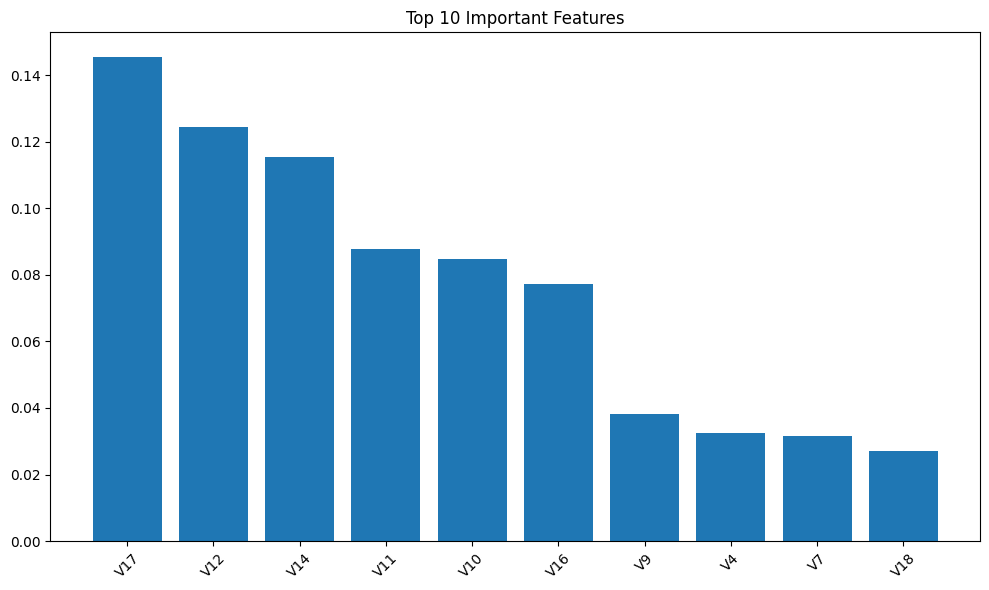

In [11]:

importances = model.feature_importances_
indices = np.argsort(importances)[-10:][::-1]  # Top 10 features

plt.figure(figsize=(10, 6))
plt.title("Top 10 Important Features")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), [X.columns[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()
